In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-40.352948709331656 -11.815853258956906
82.50478225506015 99.04812360215152
-74.30528863556741 -160.61954131604415
-81.05772531673476 -78.93582310435133
77.06342499423343 -169.4015883673325
60.96141180075725 -47.651961279747866
26.062886628314757 109.67848210630626
78.4757124024587 28.761781924790313
31.392346243367115 159.82745373710986
24.120051261154956 12.739875714260393
-80.48594635235054 -176.48605202664734
58.09785023886607 46.67202580266829
18.992517489279024 -98.38861588174292
80.04567264577426 17.354322178435325
-28.047990651108293 88.02112729016164
-46.50417754520208 38.36166998124068
-73.39592037454317 -56.05106179694194
-25.412205504438376 68.31740521547945
15.206833603548773 103.33143504445553
-13.023669028784951 -64.46356641684908
50.79882937424918 -154.55672076447132
-86.68123058198657 146.20953598512853
85.23500982041631 -35.29907302814121
-74.295966096614 152.91741951793307
-21.451201422349286 -176.42650665427934
-37.75351793681702 133.88265324982711
-16.5798946880740

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=388cd579286c53622840a03a52ed70bc


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | guilin
Processing Record 8 of Set 1 | mehamn
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | marzuq
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | vakhtan
Processing Record 13 of Set 1 | tianguismanalco
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | satuk
Processing Record 19 of Set 1 | san ramon
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | tasiilaq
Processi

Processing Record 41 of Set 4 | plettenberg bay
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | uarini
Processing Record 47 of Set 4 | bistret
Processing Record 48 of Set 4 | topi
Processing Record 49 of Set 4 | ust-ishim
Processing Record 50 of Set 4 | champasak
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | todos santos
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | teknaf
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | yambio
Processing Record 9 of Set 5 | puerto ayora
Processing Record 10 of Set 5 | vanavara
Processing Record 11 of Set 5 | iqaluit
Processing Record 12 of Set 5 | shirokiy
Processing Record 13 of Set 5 | aswan
Processing Record 14 of Set 5 | vanim

Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | linhares
Processing Record 33 of Set 8 | sampit
Processing Record 34 of Set 8 | villazon
Processing Record 35 of Set 8 | kawalu
Processing Record 36 of Set 8 | narva-joesuu
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | hammerfest
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | ondangwa
Processing Record 41 of Set 8 | morant bay
Processing Record 42 of Set 8 | muswellbrook
Processing Record 43 of Set 8 | kirakira
Processing Record 44 of Set 8 | boden
Processing Record 45 of Set 8 | novita
Processing Record 46 of Set 8 | verkhniy mamon
Processing Record 47 of Set 8 | vagur
Processing Record 48 of Set 8 | nome
Processing Record 49 of Set 8 | izhma
Processing Record 50 of Set 8 | melfi
Processing Record 1 of Set 9 | noumea
Processing Record 2 of Set 9 | dingle
Processing Record 3 of Set 9 | bargal
City not found. Skipping...
Processing Record 4 of Set 9 | hihifo
City not fo

Processing Record 16 of Set 12 | puerto penasco
Processing Record 17 of Set 12 | luanda
Processing Record 18 of Set 12 | alice springs
Processing Record 19 of Set 12 | marcona
City not found. Skipping...
Processing Record 20 of Set 12 | te anau
Processing Record 21 of Set 12 | port hawkesbury
Processing Record 22 of Set 12 | razdolinsk
Processing Record 23 of Set 12 | traverse city
Processing Record 24 of Set 12 | karaul
City not found. Skipping...
Processing Record 25 of Set 12 | manyana
Processing Record 26 of Set 12 | akdepe
Processing Record 27 of Set 12 | ulladulla
Processing Record 28 of Set 12 | byron bay
Processing Record 29 of Set 12 | sembakung
Processing Record 30 of Set 12 | arzakan
Processing Record 31 of Set 12 | dubti
Processing Record 32 of Set 12 | kang
Processing Record 33 of Set 12 | havoysund
Processing Record 34 of Set 12 | ilulissat
Processing Record 35 of Set 12 | marystown
Processing Record 36 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 12 

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,81.52,39,40,14.97,US,2022-06-01 16:07:08
1,Khatanga,71.9667,102.5000,38.37,95,100,8.97,RU,2022-06-01 16:07:09
2,Mataura,-46.1927,168.8643,52.48,82,96,4.07,NZ,2022-06-01 16:07:09
3,Ushuaia,-54.8000,-68.3000,35.22,80,98,1.61,AR,2022-06-01 16:06:33
4,Lavrentiya,65.5833,-171.0000,38.71,86,28,6.04,RU,2022-06-01 16:07:10
5,Qaqortoq,60.7167,-46.0333,42.39,72,100,3.83,GL,2022-06-01 16:07:10
6,Guilin,25.2819,110.2864,74.48,97,98,1.59,CN,2022-06-01 16:07:10
7,Mehamn,71.0357,27.8492,57.15,54,0,6.91,NO,2022-06-01 16:07:11
8,Marzuq,14.4000,46.4667,82.38,40,36,9.80,YE,2022-06-01 16:07:11
9,Vaini,-21.2000,-175.2000,73.56,88,20,5.75,TO,2022-06-01 16:07:12


In [20]:
# reorder DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654101625.9226174

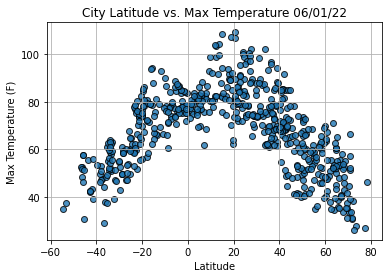

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

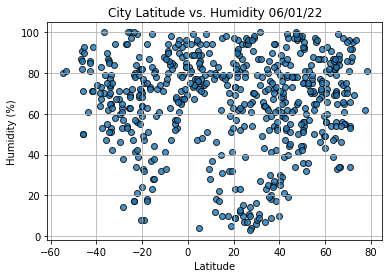

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

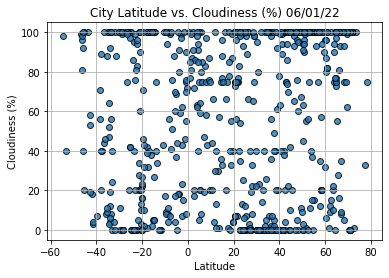

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

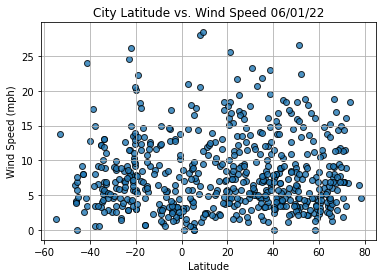

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Carnarvon
Country                        AU
Date          2022-06-01 16:07:13
Lat                      -24.8667
Lng                      113.6333
Max Temp                    64.98
Humidity                       51
Cloudiness                      0
Wind Speed                  12.62
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-06-01 16:07:08,42.0970,-79.2353,81.52,39,40,14.97
1,Khatanga,RU,2022-06-01 16:07:09,71.9667,102.5000,38.37,95,100,8.97
4,Lavrentiya,RU,2022-06-01 16:07:10,65.5833,-171.0000,38.71,86,28,6.04
5,Qaqortoq,GL,2022-06-01 16:07:10,60.7167,-46.0333,42.39,72,100,3.83
6,Guilin,CN,2022-06-01 16:07:10,25.2819,110.2864,74.48,97,98,1.59


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

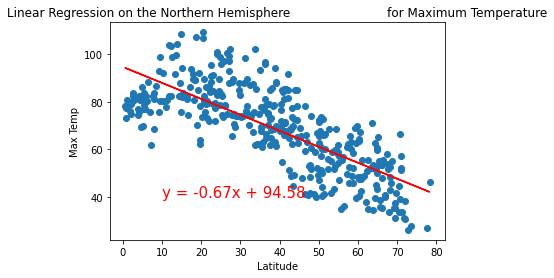

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

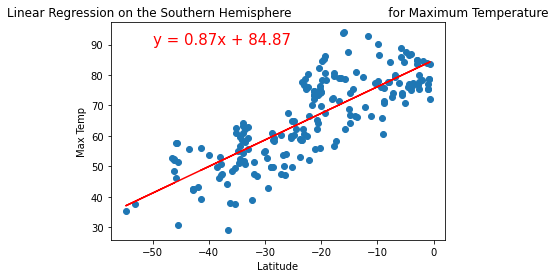

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

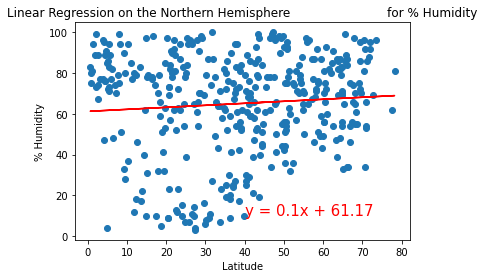

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

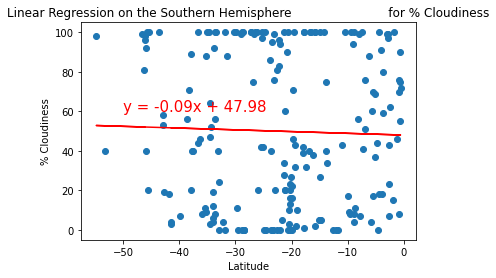

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

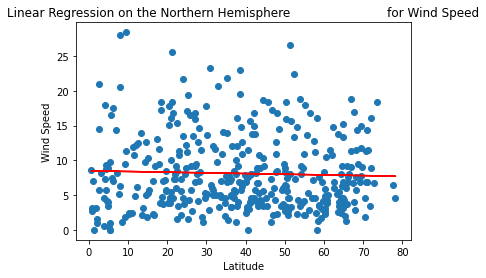

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

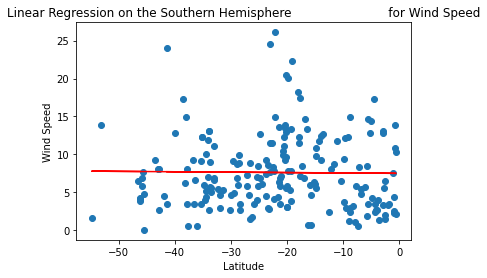

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))